# Auto inssurance 

In [2]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter

In [3]:
folder = "D:\\Test Technique\\Descrate 2312\\Test Descartes Underwriting"
data_folder = folder + "\\auto-insurance-fall-2017"

In [4]:
X_df = pd.read_csv(data_folder + "\\train_auto.csv")
X_df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


Our data set is composed of 8161 rows and 26 columns, The first being INDEX that represent the index of the observation in the real data set. This column can be dropped. 

Our target is TARGET_FLAG : if this person is risky or not which is a binary variable.

We can observe some NaN values and some numerical values are strings because of the $ and , in the value. 

In this data we have 15 numerical features and 10 categorical features.  

The features can be divided into two groups: Human related and Car related.

In [5]:
X_df = X_df.drop(['INDEX'], axis=1)

In [5]:
X_df.describe()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


In [6]:
X_df.describe(include = 'O')

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY
count,7716,8161,7697,8161,8161,8161,7635,8161,8161,8161,8161,8161,8161,8161
unique,6612,2,5106,2,2,5,8,2,2789,6,2,2857,2,2
top,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,No,Highly Urban/ Urban
freq,615,7084,2294,4894,4375,2330,1825,5132,157,2294,5783,5009,7161,6492


In [7]:
X_df.columns

Index(['TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
       'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

## 1- Data Manipulation

### Check the percentage of nan values in each columns

In [8]:
X_df.isna().sum() / len(X_df) * 100

TARGET_FLAG    0.000000
TARGET_AMT     0.000000
KIDSDRIV       0.000000
AGE            0.073520
HOMEKIDS       0.000000
YOJ            5.563044
INCOME         5.452763
PARENT1        0.000000
HOME_VAL       5.685578
MSTATUS        0.000000
SEX            0.000000
EDUCATION      0.000000
JOB            6.445289
TRAVTIME       0.000000
CAR_USE        0.000000
BLUEBOOK       0.000000
TIF            0.000000
CAR_TYPE       0.000000
RED_CAR        0.000000
OLDCLAIM       0.000000
CLM_FREQ       0.000000
REVOKED        0.000000
MVR_PTS        0.000000
CAR_AGE        6.249234
URBANICITY     0.000000
dtype: float64

the number of nan is inferior to 30%.

All features can be kept. 

### Clean The values of each column 

We start by implementing the function 'dataframe_transform' that apply the fucntion 'func' to all the columns in 'columns' of the data frame X.

In [6]:
def dataframe_transform(X, columns, func): 
    for column in columns : 
        X[column] = X[column].apply(func= func)

This function remove the $ sign and change features into numerical.

In [7]:
def feature_to_float(x): 
    if type(x) != str : 
        return x
    return float(x[1:].replace(",", ""))

In [8]:
numerical_columns = ["TARGET_FLAG", 
                "TARGET_AMT",
                "KIDSDRIV",
                "AGE",
                "HOMEKIDS",
                "YOJ",
                "TRAVTIME",
                "TIF",
                "CLM_FREQ",
                "MVR_PTS",
                "CAR_AGE",
                "INCOME",
                "BLUEBOOK",
                "OLDCLAIM",
                "HOME_VAL"]

In [9]:
dataframe_transform(X_df, numerical_columns, feature_to_float)

This function will transform answers into the values 1 if yes and 0 if no.

In [13]:
categorical_columns = ["EDUCATION", "JOB", "CAR_TYPE", "PARENT1", "MSTATUS", "RED_CAR", "REVOKED", "SEX", "CAR_USE", "URBANICITY"]

### Check the relationship between target_flag and target_amt


Text(0.5, 1.0, ' The distrubiton of TARGET_FLAG')

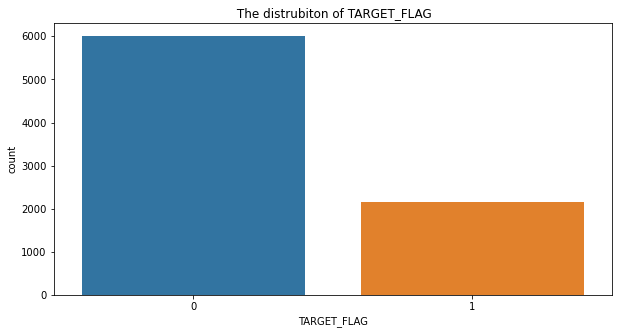

In [17]:
DataFrame = X_df[["TARGET_FLAG","TARGET_AMT"]]
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot( x = DataFrame["TARGET_FLAG"])
plt.title(" The distrubiton of TARGET_FLAG")

In [15]:
print( "class 0 precentage: ", np.sum(X_df["TARGET_FLAG"] == 0) / len(X_df) *100 )  
print( "class 1 precentage: ", np.sum(X_df["TARGET_FLAG"] == 1) / len(X_df) *100 )  

class 0 precentage:  73.61842911407915
class 1 precentage:  26.38157088592084


Also our target is highly imbalanced.
We might need to use under-sampling or over-sampling methods.

In [16]:
np.array([[np.sum(DataFrame.TARGET_FLAG == 1), np.sum(DataFrame.TARGET_AMT > 0)],
          [np.sum(DataFrame.TARGET_FLAG == 0), np.sum(DataFrame.TARGET_AMT == 0)]])

array([[2153, 2153],
       [6008, 6008]], dtype=int64)

The feature TARGET_AMT is null whenever our target is not risky and if TARGET_AMT is not null, TARGET_FLAG is 1. 
We can think that TARGET_AMT represent the amount of the claim. 

## 2 - Data Analysis

We will start by observing some Human related features then some car related features. 

### 2-1 Human features

In [17]:
Human_features = ['KIDSDRIV', 'AGE', 'HOMEKIDS',
                  'INCOME', 'PARENT1', 'HOME_VAL', 
                  'MSTATUS', 'SEX', 'EDUCATION', 
                  'JOB', 'TRAVTIME', 'CAR_USE',
                  'OLDCLAIM', 'CLM_FREQ', 'URBANICITY'
                 'MVR_PTS', 'TIF', 'YOJ']

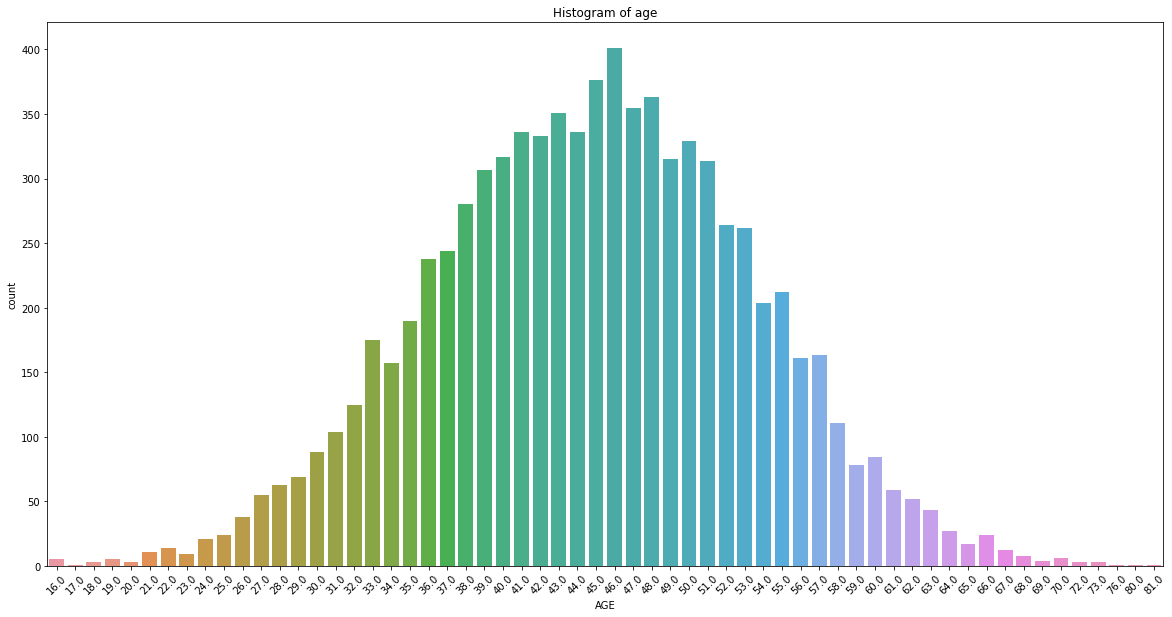

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data= X_df, x= 'AGE')
plt.xticks(rotation = 45)
plt.title("Histogram of age")
plt.show()

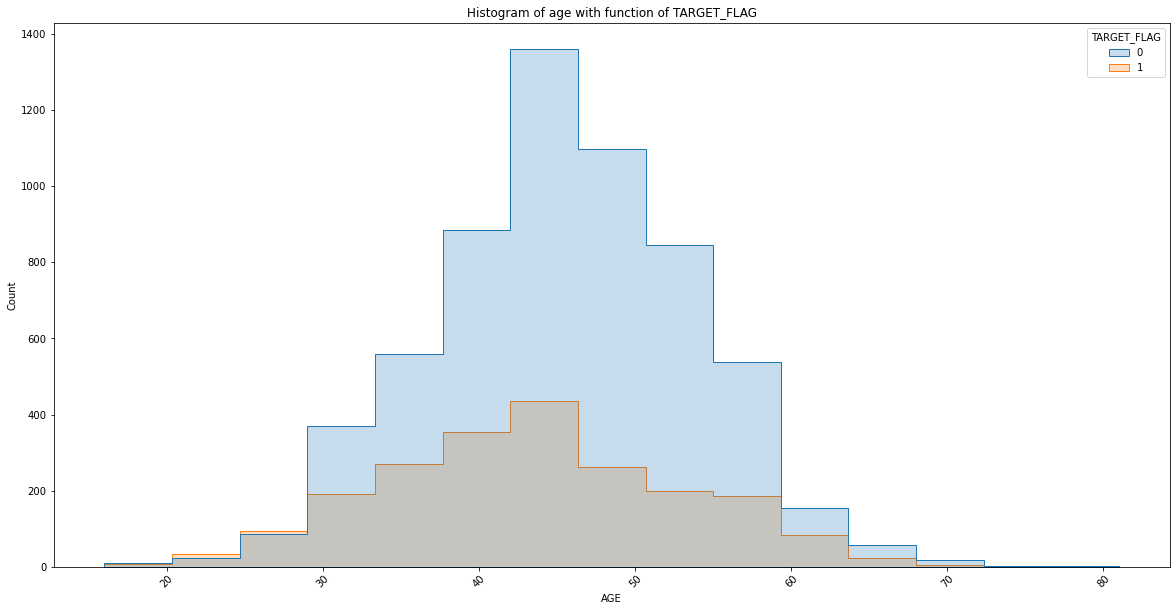

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'AGE', bins= 15, hue= "TARGET_FLAG",  element="step")
plt.xticks(rotation = 45)
plt.title("Histogram of age with function of TARGET_FLAG")
plt.show()

The age are highly concentrated in the age of 46. We can even see a gaussian distribution.
We can observe that for the age between 20 and 30 the risky proportion is higher than the non-risky class. 

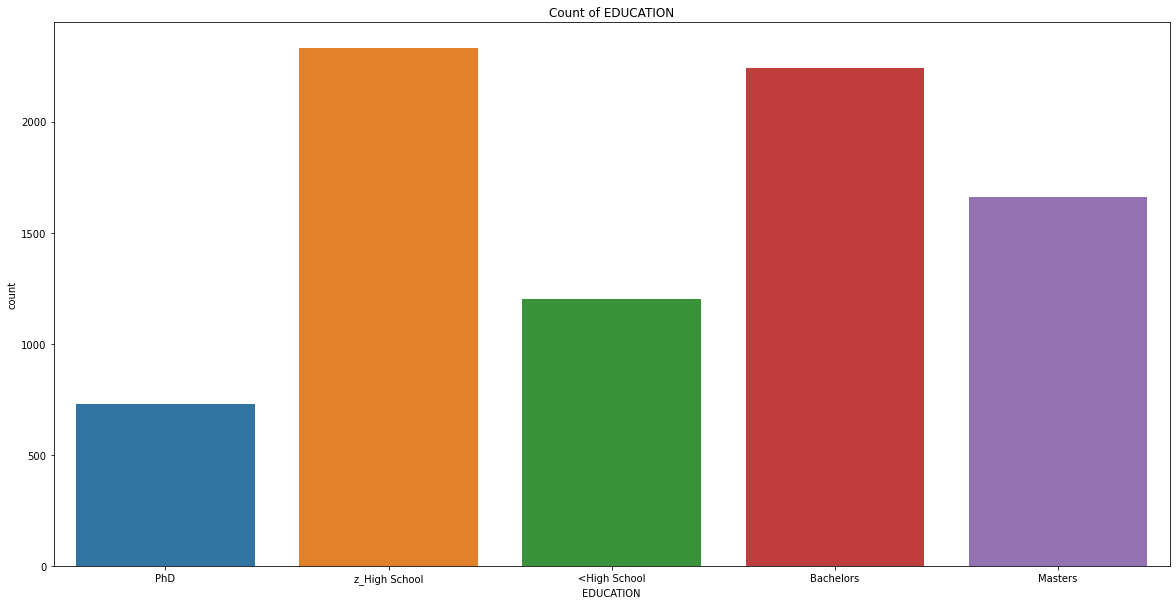

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
X_df.loc[:,'EDUCATION']=X_df.loc[:,'EDUCATION'].fillna('MISSING')
sns.countplot(ax = ax, data= X_df, x= 'EDUCATION')
plt.title("Count of EDUCATION")
plt.show()

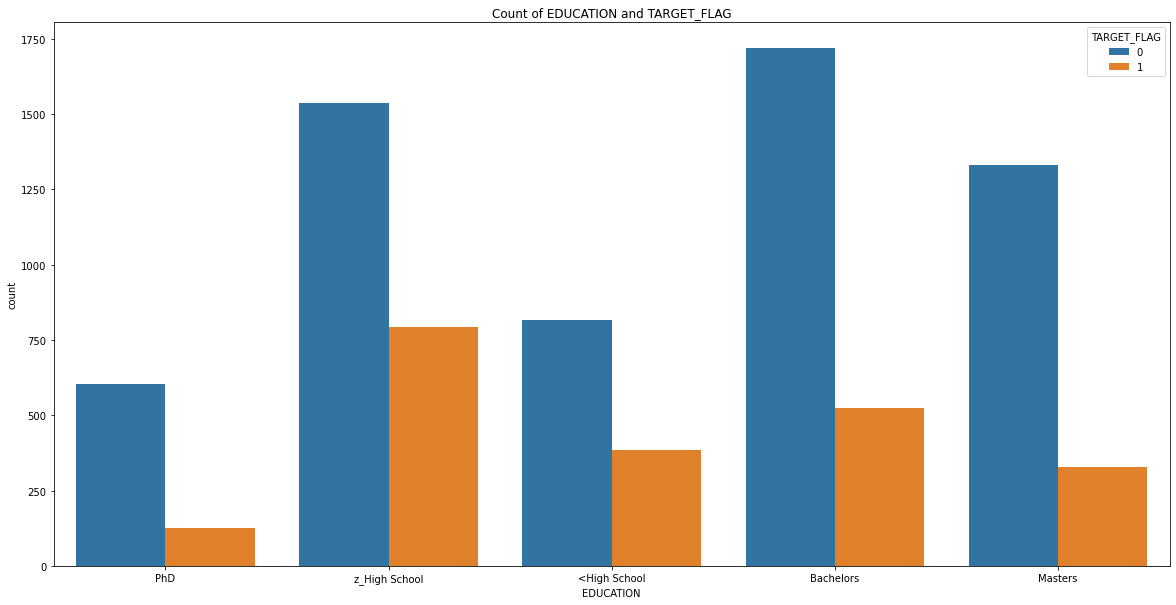

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
X_df.loc[:,'EDUCATION']=X_df.loc[:,'EDUCATION'].fillna('MISSING')
sns.countplot(ax = ax, data= X_df, x= 'EDUCATION', hue= "TARGET_FLAG")
plt.title("Count of EDUCATION and TARGET_FLAG")
plt.show()

In [10]:
X_df[['EDUCATION','TARGET_FLAG']].groupby(['EDUCATION']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
EDUCATION,
z_High School,34.034335
<High School,32.003325
Bachelors,23.327386
Masters,19.722557
PhD,17.170330


As for the number risky person we observe a high concentration for the class High School and <High School. 
This increase our suspession that our FLAG_TARGET is related to young people. 

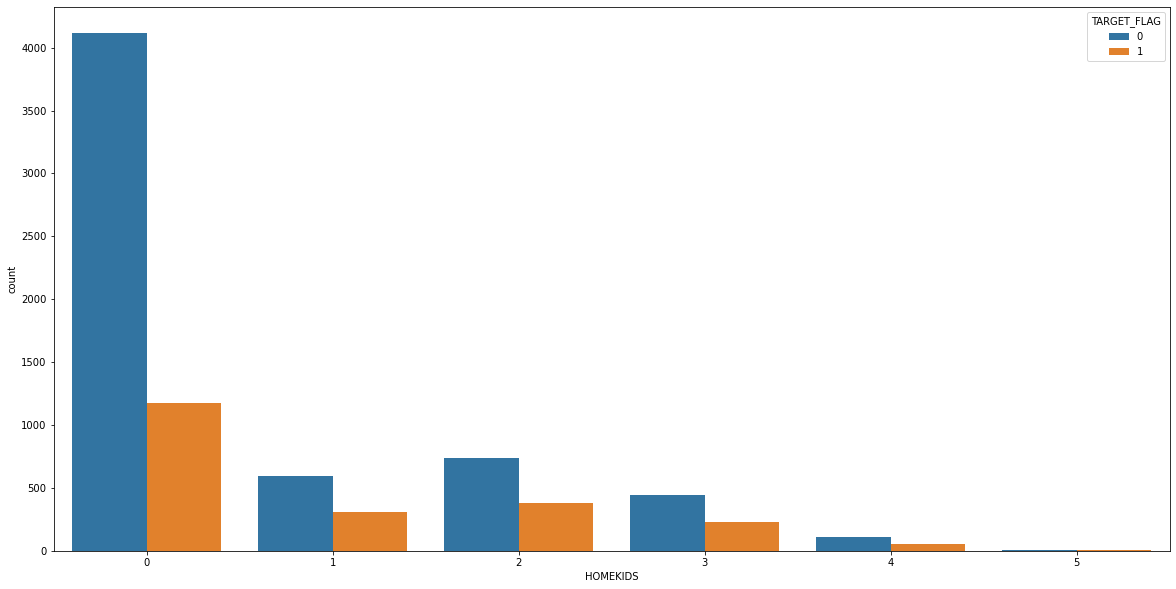

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
X_df['HOMEKIDS'] = X_df['HOMEKIDS'].astype('object')
sns.countplot(ax = ax, data= X_df, x= 'HOMEKIDS', hue= "TARGET_FLAG")
plt.title("Count of HOMEKIDS and TARGET_FLAG")
plt.show()

In [11]:
X_df[['HOMEKIDS','TARGET_FLAG']].groupby(['HOMEKIDS']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
HOMEKIDS,
5,42.857143
4,34.756098
2,34.168157
3,34.124629
1,33.813747
0,22.178106


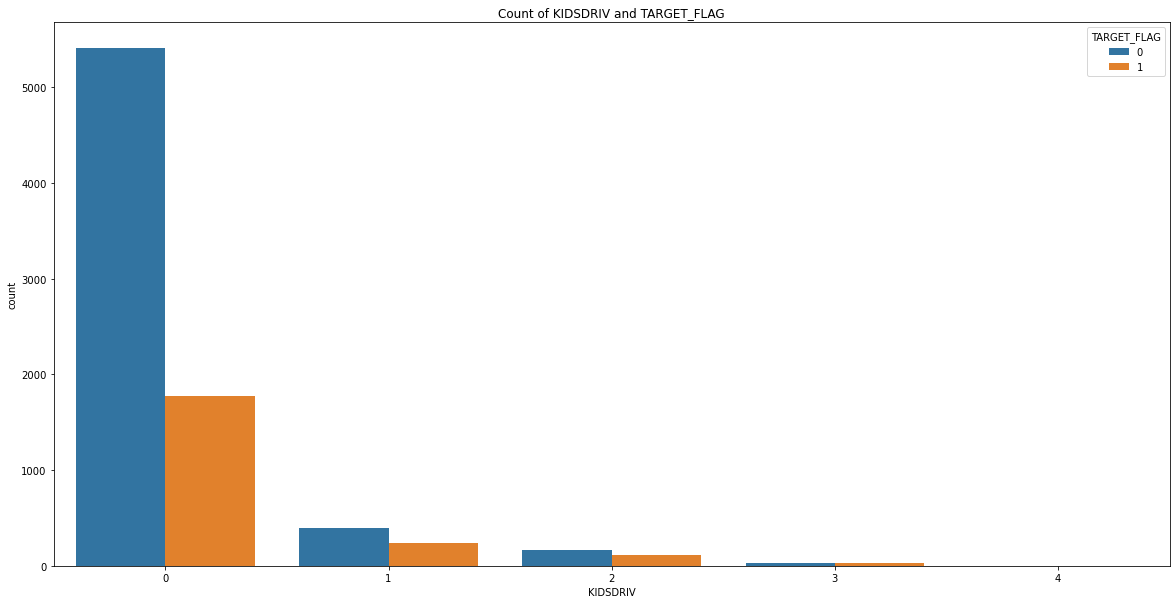

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
X_df['KIDSDRIV'] = X_df['KIDSDRIV'].astype('object')
sns.countplot(ax = ax, data= X_df, x= 'KIDSDRIV', hue= "TARGET_FLAG")
plt.title("Count of KIDSDRIV and TARGET_FLAG")
plt.show()

In [12]:
X_df[['KIDSDRIV','TARGET_FLAG']].groupby(['KIDSDRIV']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
KIDSDRIV,
3,50.000000
4,50.000000
2,39.784946
1,37.106918
0,24.693593


We can observe the more Kids you have specially those who can drive the more the chance of being a risky case.

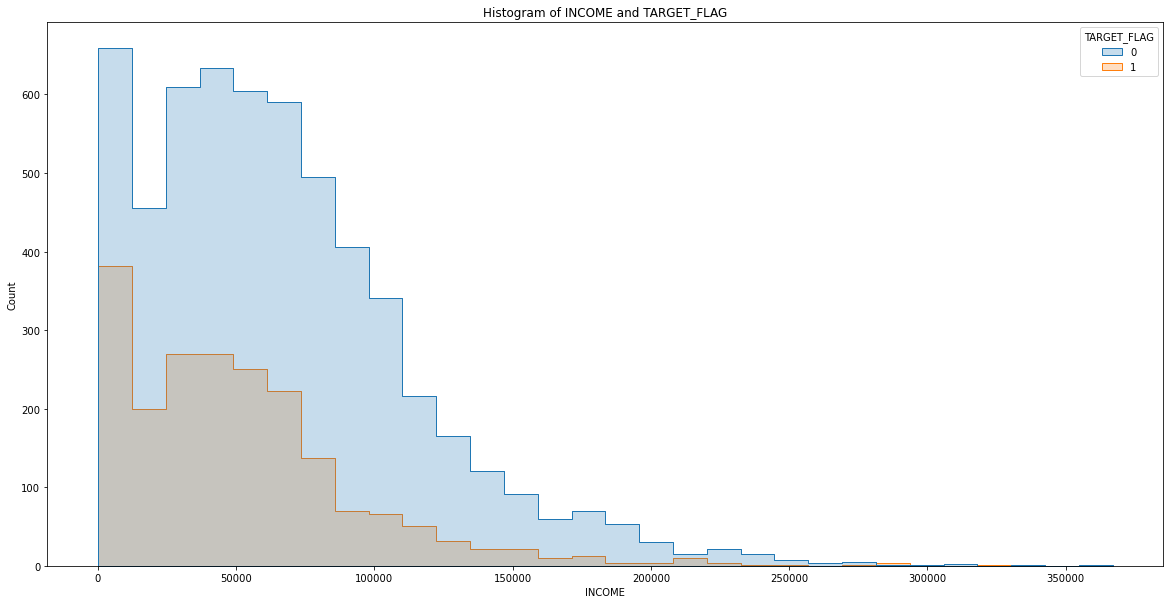

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'INCOME', bins= 30, hue= "TARGET_FLAG",  element="step")
plt.title("Histogram of INCOME and TARGET_FLAG")
plt.show()

The least income you have the least number of cars. Which is something logical since there aren't many people with high income. 

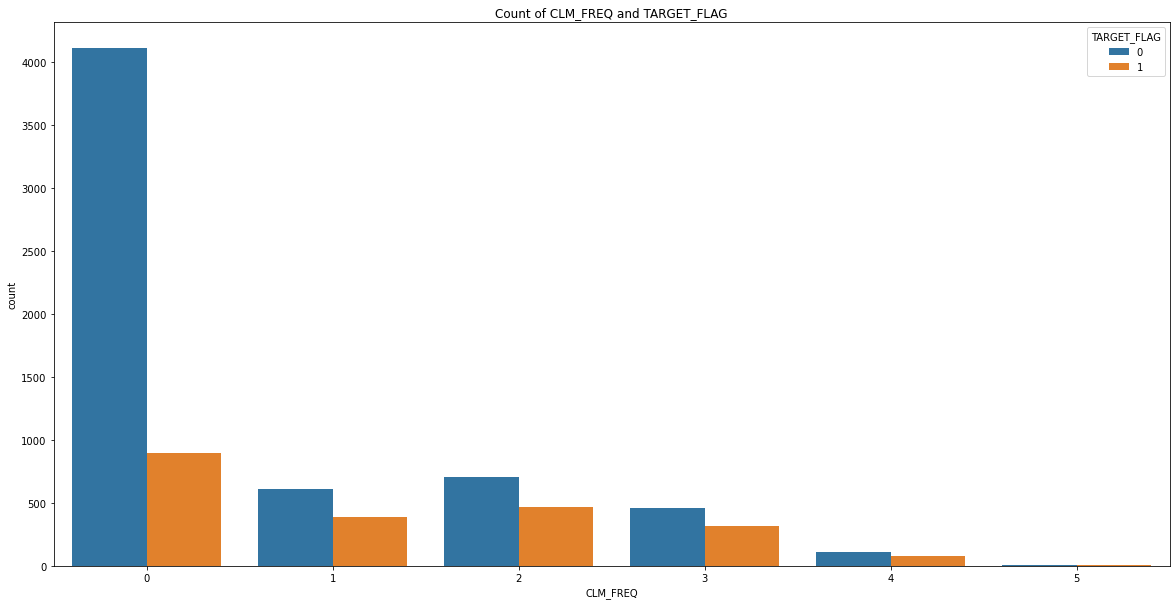

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(ax = ax, data= X_df, x= 'CLM_FREQ', hue= "TARGET_FLAG")
plt.title("Count of CLM_FREQ and TARGET_FLAG")
plt.show()

In [26]:
X_df[['CLM_FREQ','TARGET_FLAG']].groupby(['CLM_FREQ']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
CLM_FREQ,
4,42.105263
3,40.463918
2,40.051238
5,38.888889
1,38.615848
0,17.927730


The more CLM_FREQ you have, the more likely to be classified as a risky person. 

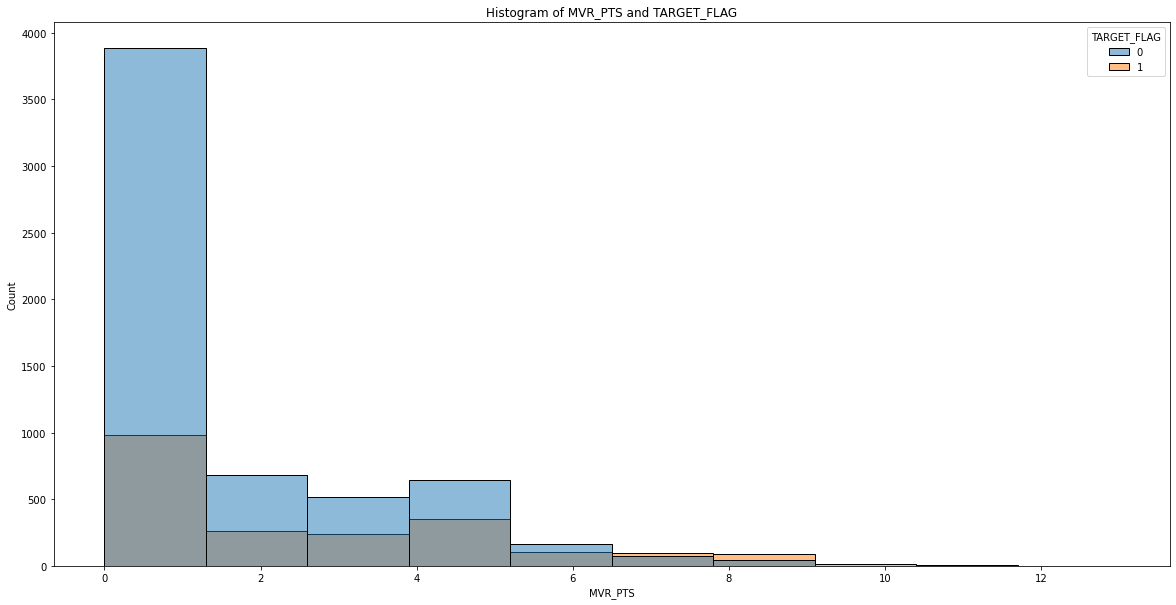

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'MVR_PTS', bins = 10, hue= "TARGET_FLAG")
plt.title("Histogram of MVR_PTS and TARGET_FLAG")
plt.show()

In [28]:
X_df[['MVR_PTS','TARGET_FLAG']].groupby(['MVR_PTS']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
MVR_PTS,
13,100.000000
10,84.615385
11,81.818182
9,73.333333
8,65.476190
7,56.287425
6,39.097744
5,37.343358
4,34.223706


The higher the MVR_PTS the more likely to be a risky individual. In fact, MVR_PTS is a scoring system where we attribut point to the driver in review of his driving history.

### 2-2 Car related features

In [29]:
Car_features = ['BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'CAR_AGE']

In [13]:
Counter(X_df.CAR_AGE.fillna(method= "ffill"))

Counter({18.0: 158,
         1.0: 2054,
         10.0: 497,
         6.0: 476,
         17.0: 232,
         7.0: 555,
         11.0: 502,
         9.0: 558,
         5.0: 329,
         13.0: 385,
         16.0: 244,
         20.0: 92,
         14.0: 333,
         15.0: 293,
         12.0: 396,
         8.0: 585,
         3.0: 59,
         21.0: 54,
         4.0: 139,
         19.0: 135,
         0.0: 3,
         23.0: 19,
         2.0: 13,
         22.0: 29,
         26.0: 2,
         27.0: 1,
         24.0: 10,
         25.0: 6,
         -3.0: 1,
         28.0: 1})

There is an illogical car_age (-3). This row must be droped. 

C:\Users\kaisc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


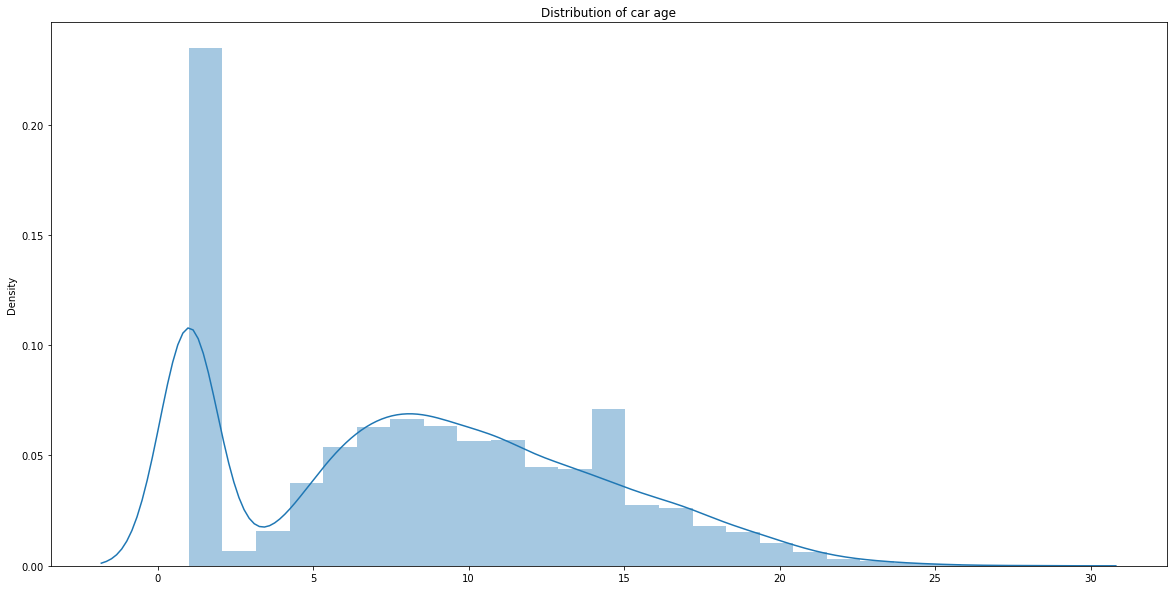

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
X_df['CAR_AGE'] = X_df['CAR_AGE'].fillna(method= "ffill")
X_df = X_df.drop(index = X_df[X_df.CAR_AGE <= 0].index)
sns.distplot(ax = ax, x= X_df['CAR_AGE'])
plt.title("Distribution of car age")
plt.show()

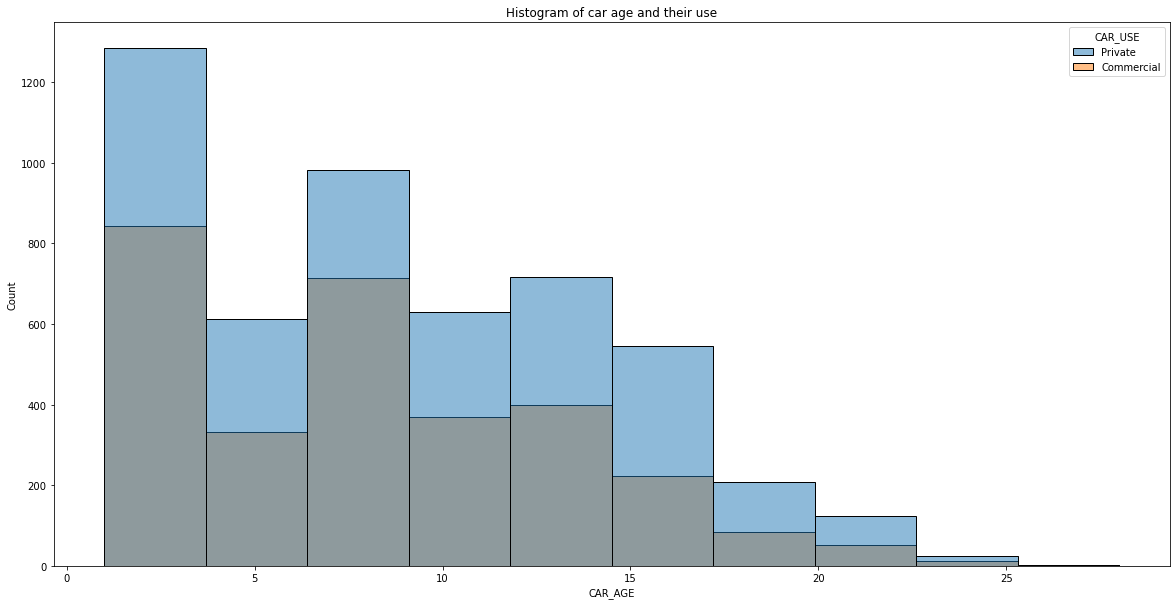

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'CAR_AGE', bins = 10, hue= "CAR_USE")
plt.title("Histogram of car age and their use")
plt.show()

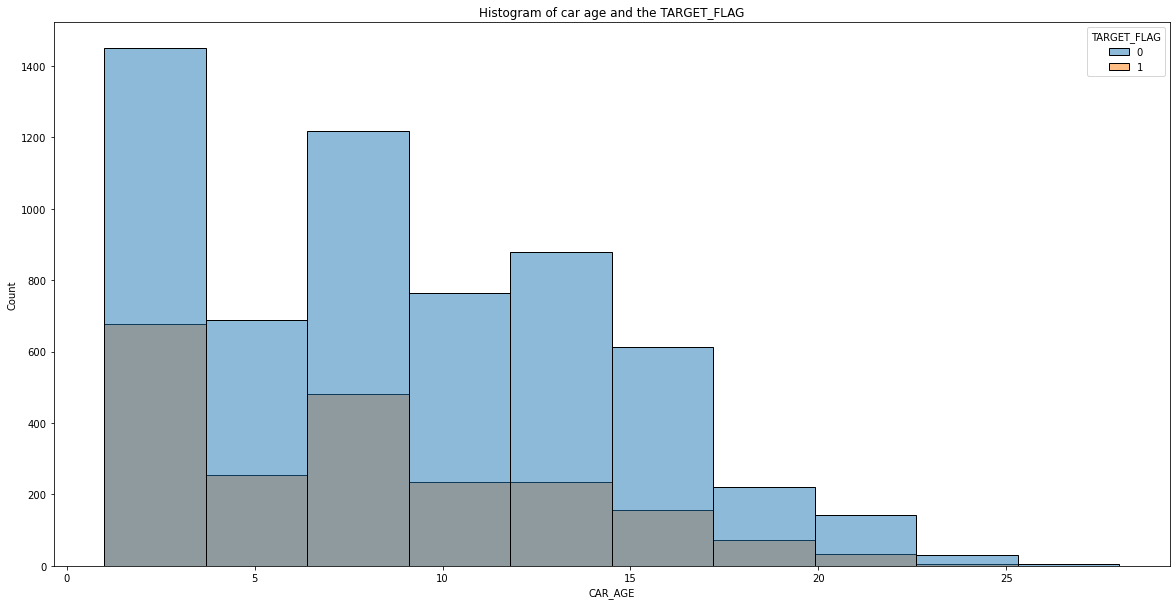

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'CAR_AGE', bins = 10, hue= "TARGET_FLAG")
plt.title("Histogram of car age and the TARGET_FLAG")
plt.show()

In [33]:
X_df[['CAR_AGE','TARGET_FLAG']].groupby(['CAR_AGE']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
CAR_AGE,
25.0,33.333333
1.0,31.937683
2.0,30.769231
7.0,29.549550
3.0,28.813559
8.0,28.717949
18.0,27.848101
6.0,27.521008
5.0,27.051672


We observe a high level in the age equals to 1 year. And then a gaussian distrubtion centred around 7 years. 

In car industry, it's rare to see cars older than 20 years circulating the streets. 

The high proportion of risky cars are associated to the cars that have a young age. 

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

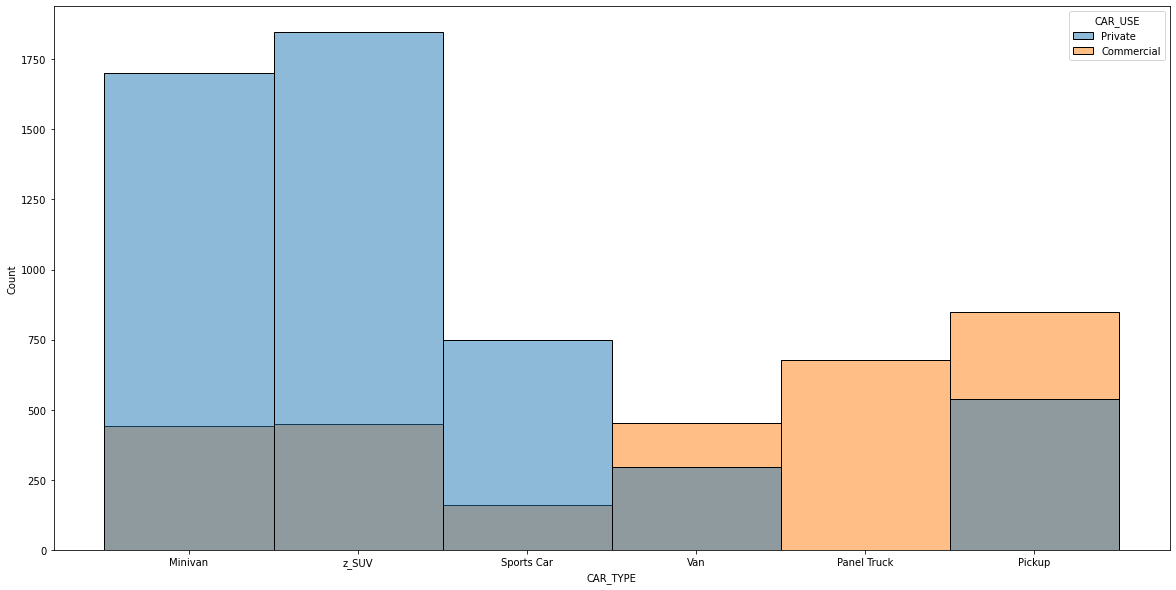

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'CAR_TYPE', bins = 10, hue= "CAR_USE")
plt.xticks(rotation = 0)

The Vans, pael truck and pickup are mostly for commercial use.

As for the other three types they are more likely to be private. 

In [35]:
X_df[['CAR_TYPE','TARGET_FLAG']].groupby(['CAR_TYPE']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)

,TARGET_FLAG
CAR_TYPE,
Sports Car,0.335171
Pickup,0.318673
z_SUV,0.295554
Van,0.268000
Panel Truck,0.263314
Minivan,0.162856


In here We can see that the sport cars have the biggest proportion being classified as risky(~33%) followed by pickup that have a proportion of ~32%. 

Minivan have a small proportion maybe because they are used by families.

C:\Users\kaisc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bluebook')

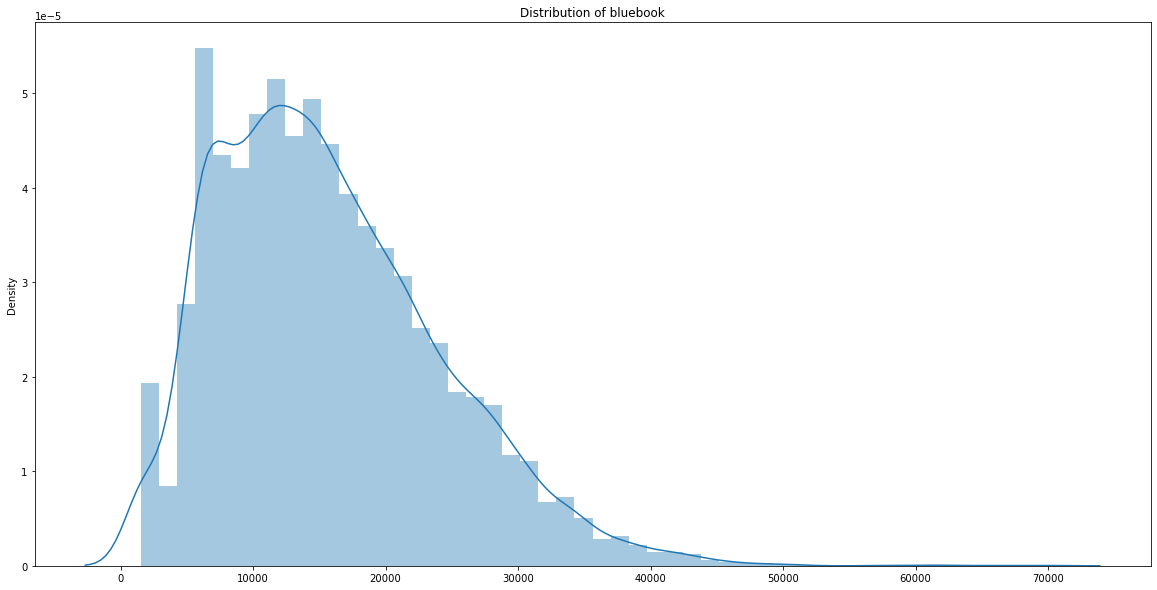

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(ax = ax, x= X_df['BLUEBOOK'])
plt.title("Distribution of bluebook")

The distrubition of the BLUEBOOK which is the price of the car. It's centered around 15000. 

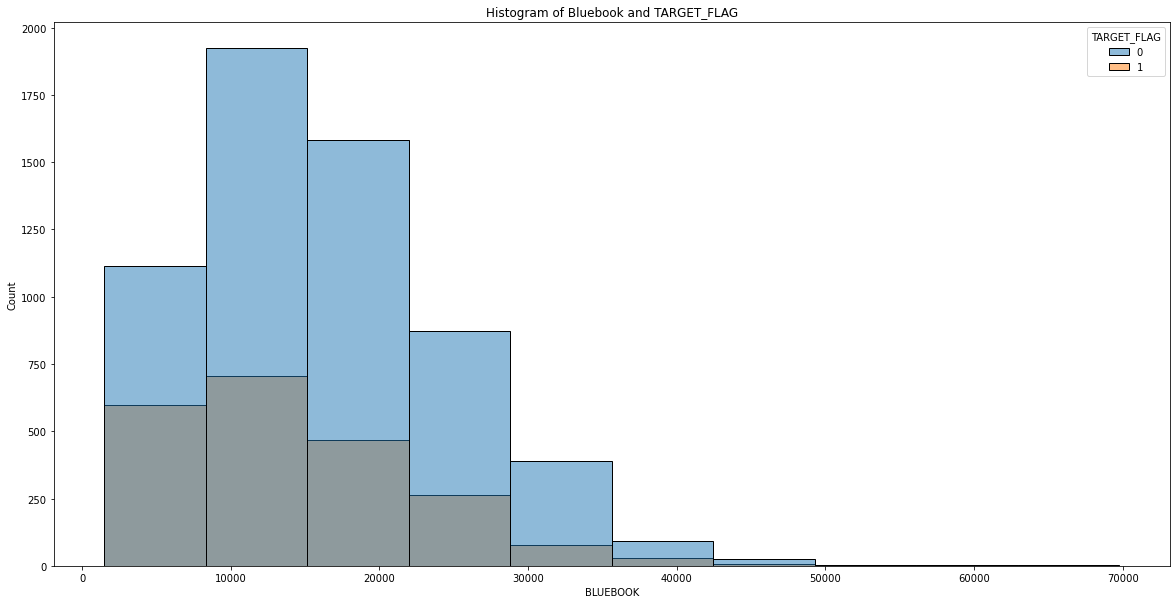

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, data= X_df, x= 'BLUEBOOK', bins = 10, hue= "TARGET_FLAG")
plt.xticks(rotation = 0)
plt.title("Histogram of Bluebook and TARGET_FLAG")
plt.show()

If the BLUEBOOK value is lower than 10000, we have a proportion of ~30% of risky cases. The higher the BULEBOOK, the proportion of riksy people increases. 

In [38]:
X_df[['REVOKED','TARGET_FLAG']].groupby(['REVOKED']).mean().sort_values(by = 'TARGET_FLAG', ascending = False)*100

,TARGET_FLAG
REVOKED,
Yes,44.288577
No,23.886018


We can see that 44.28 %  of the REVOKED cars are risky individuals. 

### 2-3 Correaltion Matrix 

In [39]:
X_df = X_df.fillna(method= "ffill")

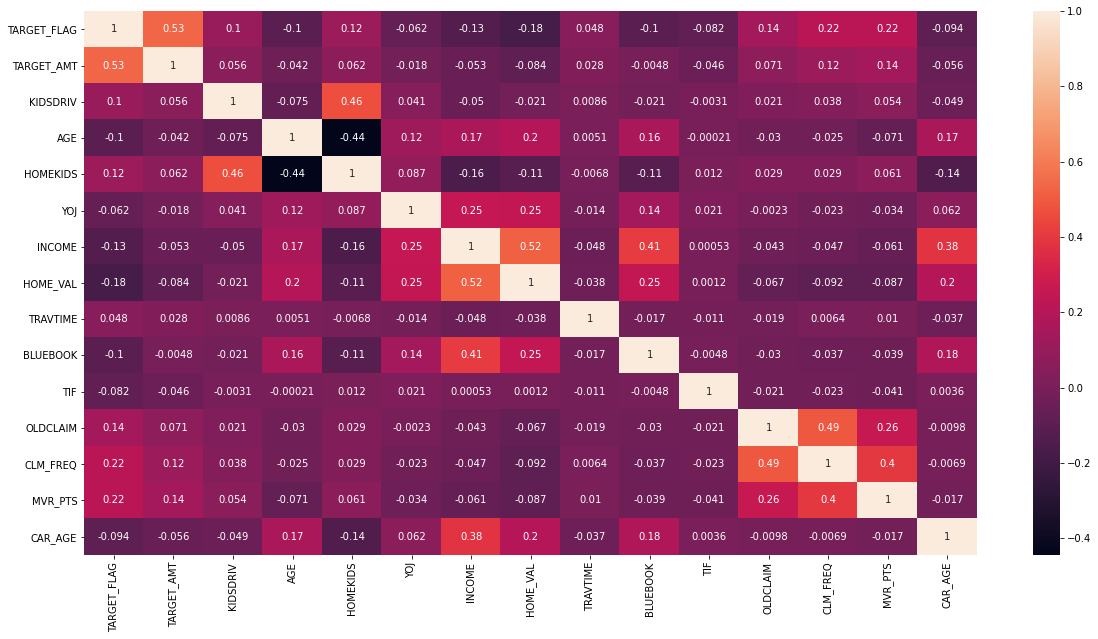

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
corrMatrix = X_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

TARGET_AMT and TARGET_FLAG are correlated(if TARGET_AMTT !=0 implies that TARGET_FLAG equals 1).

HOME_VAL and BLUEBOOK are correlated to INCOME which is obvious. 

OLD_CLAIM and CLM_FREQ are corretlated since if you have an old claim it means that your CLM_FREQ is higher than 0.


### 2-4 Random forest model to observe features importance

In [33]:
X_df = pd.read_csv(data_folder + "\\train_auto.csv")
y = X_df.TARGET_FLAG
X_df = X_df.drop(columns=['TARGET_FLAG', 'TARGET_AMT'])
numerical_columns.remove("TARGET_FLAG")
numerical_columns.remove("TARGET_AMT")

In [34]:
cat_columns = ["EDUCATION", "JOB", "CAR_TYPE"]
binary_columns = ["PARENT1", "MSTATUS", "RED_CAR", "REVOKED", "SEX", "CAR_USE", "URBANICITY"]

In [35]:
from sklearn.model_selection import train_test_split
random_state = 1
X_train, X_test, y_train,y_test = train_test_split(X_df, y, test_size=0.3, random_state=random_state)

In [36]:
print("The proportion of class 1 of the total set ",np.mean(y))
print("The proportion of class 1 of the training set ",np.mean(y_train))
print("The proportion of class 1 of the testing set ",np.mean(y_test))

The proportion of class 1 of the total set  0.2638157088592084
The proportion of class 1 of the training set  0.26383053221288516
The proportion of class 1 of the testing set  0.263781135157207


Since our data is imbalanced we must check the proportion of each of the class in both sets to avoid a situation where a set contains a proportion a lot higher than the total proportion.

In [37]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

def feature_to_float_data_frame(X_df): 
    columns = X_df.columns 
    dataframe_transform(X_df, columns, feature_to_float)
    return X_df
transformer = FunctionTransformer(
    feature_to_float_data_frame
)

numeric_transformer = Pipeline(steps=[
    ('transform', transformer),
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('bin', binary_transformer, binary_columns),
        ('cat', categorical_transformer, cat_columns)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x00000214C4EB9EE0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                             

In [38]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7933850551245406

In [39]:
columns = numerical_columns + binary_columns +  cat_columns

In [40]:
enc_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(cat_columns)
labels = np.concatenate([numerical_columns, binary_columns, enc_cat_features])

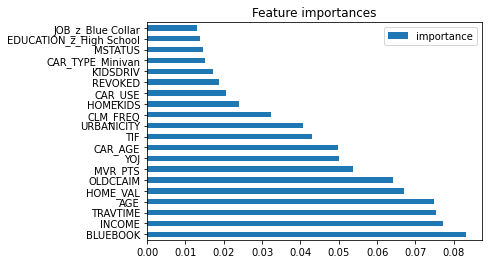

In [41]:
importance =  clf.get_params()['classifier'].feature_importances_
df_importance = pd.DataFrame({'importance':importance}, index = labels)
df_importance = df_importance.sort_values('importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh")
plt.title("Feature importances")
plt.show()

In [42]:
df_importance.iloc[:21]

,importance
BLUEBOOK,0.083178
INCOME,0.077227
TRAVTIME,0.075256
AGE,0.074936
HOME_VAL,0.067072
OLDCLAIM,0.064094
MVR_PTS,0.053822
YOJ,0.050011
CAR_AGE,0.049847
TIF,0.043085


Our model gave an accuracy of 0.78 which allow us to believe the observed values. 

Here we kept the most important features. 

In [51]:
num_cols = ["BLUEBOOK", "INCOME", "TRAVTIME", "AGE", "HOME_VAL"
            "OLDCLAIM", "MVR_PTS", "CAR_AGE", "YOJ", "TIF",
            "CLM_FREQ", "HOMEKIDS", "KIDSDRIV"]
bin_cols = ["PARENT1", "REVOKED", "CAR_USE",  "MSTATUS"]
cat_cols = ["CAR_TYPE", "EDUCATION", "URBANICITY"]


### 2-5 A Linear regressor to observe the features impact 

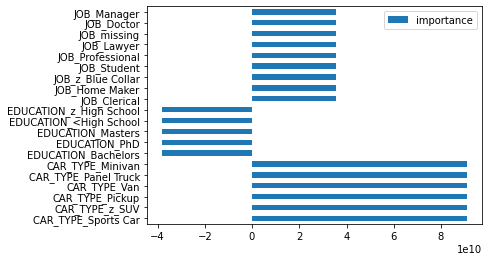

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import sklearn


model = make_pipeline(
    preprocessor,
    linear_model.LinearRegression()
)
model.fit(X_train, y_train)
coefs = model[1].coef_
df_importance = pd.DataFrame({'importance':coefs,'abs_importance':abs(coefs)},index = labels)
df_importance = df_importance.sort_values('abs_importance',ascending=False)
df_importance.iloc[:20].plot(kind = "barh",y = 'importance')

CAR_TYPE and EDUCATION are the most important features in the linear regressor. However we didn't observe such an importance while doing using the random forest model.

### Conclusion

After an analysis of our data, we observed that: 

- Our data is highly imbalanced 24% type 1 to 76% type 0. 
- We posses NaN that needs to be filled using some imputer.
- The risky individuals are generally related to young people (Student in High school). 
- The past beahviour of our individual whenever he has been revoked and the number of claims he made. 


## 4  Model Prediction 

In here we will use three diffrent approachs: 

- A regular approach using random forest and Xgboost. 

- Application of oversampling method on the data to fix the diffrence the classes.

- Utilization of BalanceedRandomForestClassifier and HistGradientBoostingClassifier who have the ability to learn imbalanced data. 

We will divide our data into three diffrent sets: 

- Training set, used to train the model 
- Testing set, used to tune the hyper-parameters (used with a gridSearchCV).
- Validation set, used to test the final performance of our model. 

###  4-1 Regular model

In [54]:
Model= {} # A dict to save the result of every model to comapre them in the end
ac = {}

In [55]:
random_state = 1 # To keep the same results
np.random.seed(123)

We will split our data into 2 set 70% for train (this set will be used in the Training and Tuning phase) and 30% for test (Final validation phase). 

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=random_state)

In [57]:
print("The proportion of class 1 of the total set ",np.mean(y))
print("The proportion of class 1 of the training set ",np.mean(y_train))
print("The proportion of class 1 of the testing set ",np.mean(y_test))

The proportion of class 1 of the total set  0.2638157088592084
The proportion of class 1 of the training set  0.2627144607843137
The proportion of class 1 of the testing set  0.2682180036742192


We create our preprocessor that will encode the categorical features.

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
def feature_to_float_data_frame(X_df): 
    columns = X_df.columns 
    dataframe_transform(X_df, columns, feature_to_float)
    return X_df

transformer = FunctionTransformer(
    feature_to_float_data_frame
)

numeric_transformer = Pipeline(steps=[
    ('transform', transformer),
    ('imputer', SimpleImputer(strategy= 'mean')),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('bin', OrdinalEncoder())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('bin', binary_transformer, binary_columns),
        ('cat', categorical_transformer, cat_columns)])

#### 4-1.1 Logistic regreession

In [59]:
from sklearn.linear_model import LogisticRegression


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [60]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
Model["Logistic"] = clf.predict_proba(X_test)
ac["Logistic"] = accuracy_score(y_test, y_pred)
ac

{'Logistic': 0.8034292712798531}

#### 4-1.2 Random Forest

We prepare the grid containing different values for our model.

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# The used criterion 
criterion = ["gini", "entropy" ] 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomizedSearchCV(estimator= RandomForestClassifier(), param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose=2, n_jobs = -1))])

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.3min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [63]:
args = clf.get_params()['classifier'].best_params_
args

{'n_estimators': 635,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [64]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier(**args))])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [65]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
Model["Random_forest"] = clf.predict_proba(X_test)
ac["Random_forest"] = accuracy_score(y_test, y_pred)
ac["Random_forest"]

0.8058787507654623

#### 4-1.3 Xgboosting model

In [66]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in boosting
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# The learning rate of each tree 
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

In [67]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
# We kept the hypertparameters after tuning (It takes a lot of time)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RandomizedSearchCV(estimator= XGBClassifier(), param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1))])

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 33.2min finished
C:\Users\kaisc\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [68]:
args = clf.get_params()['classifier'].best_params_
args

{'n_estimators': 374,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'learning_rate': 0.01}

In [69]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',XGBClassifier(**args))])
clf.fit(X_train, y_train)

C:\Users\kaisc\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [70]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
Model["Gradient_Boosting"] = clf.predict_proba(X_test)
ac["Gradient_Boosting"] = accuracy_score(y_test, y_pred) 
ac["Gradient_Boosting"]

0.7924066135946112

### 4-2 Imablanced learning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# The used criterion 
criterion = ["gini", "entropy" ] 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [72]:
from imblearn.pipeline import Pipeline as Pipeline_imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline_imblearn(steps=[('preprocessor', preprocessor),
                      ('underSampler',SMOTE()),
                      ('classifier',RandomizedSearchCV(estimator= RandomForestClassifier(), param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1))])

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.4min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [73]:
args = clf.get_params()['classifier'].best_params_
args

{'n_estimators': 687,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [74]:
clf = Pipeline_imblearn(steps=[('preprocessor', preprocessor),
                      ("over_sampling", SMOTE()),
                      ('classifier',RandomForestClassifier(**args))])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [75]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
Model["Imblearn_Random_Forest"] = clf.predict_proba(X_test)
ac["Imblearn_Random_Forest"] = accuracy_score(y_test, y_pred)
ac["Imblearn_Random_Forest"]

0.8040416411512553

### 4-3 Effecient Model

#### 4-3.1 Balanced Random forest

In [76]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# The used criterion 
criterion = ["gini", "entropy" ] 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [77]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomizedSearchCV(estimator= BalancedRandomForestClassifier(), param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1))])

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.4min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [78]:
args = clf.get_params()['classifier'].best_params_
args

{'n_estimators': 426,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [79]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier(**args))])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [80]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
Model["Balanced_Random_Forest"] = clf.predict_proba(X_test)
ac["Balanced_Random_Forest"] = accuracy_score(y_test, y_pred)
ac["Balanced_Random_Forest"]

0.8034292712798531

#### 4-3.2 HistGradientBosstingClassifier

This estimator contains his own method of nan filling procedure.

In [81]:
from sklearn.model_selection import RandomizedSearchCV
#learning rate 
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 1]
# Number of trees in random forest
max_iter = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 15, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10, 20]
# Create the random grid
random_grid = {'max_iter': max_iter,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [82]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomizedSearchCV(estimator= HistGradientBoostingClassifier(), param_distributions= random_grid,
                                                       n_iter= 100, cv= 5, verbose= 2, n_jobs= -1))])

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.9min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function feature_to_float_data_frame at 0x000002086B05BAF0>)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ',
                                                   'TRAVTIME', 'TIF',
                                                   'CLM_FREQ', 'MVR_PTS',
                                                   'CAR_AGE', 

In [83]:
args = clf.get_params()['classifier'].best_params_
args

{'min_samples_leaf': 1, 'max_iter': 463, 'max_depth': 6, 'learning_rate': 0.01}

In [84]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier',HistGradientBoostingClassifier(**args))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8576899509803921

In [85]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
Model["Hist_grad_boost"] = clf.predict_proba(X_test)
ac["Hist_grad_boost"] = accuracy_score(y_test, y_pred)
ac["Hist_grad_boost"]

0.8095529699938763

## 5 Model Comparaison

In [86]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for key in Model.keys():
    y_pred = Model [key]
    fpr[key], tpr[key], _ = roc_curve(y_test, y_pred[:,1])
    roc_auc[key] = auc(fpr[key], tpr[key])

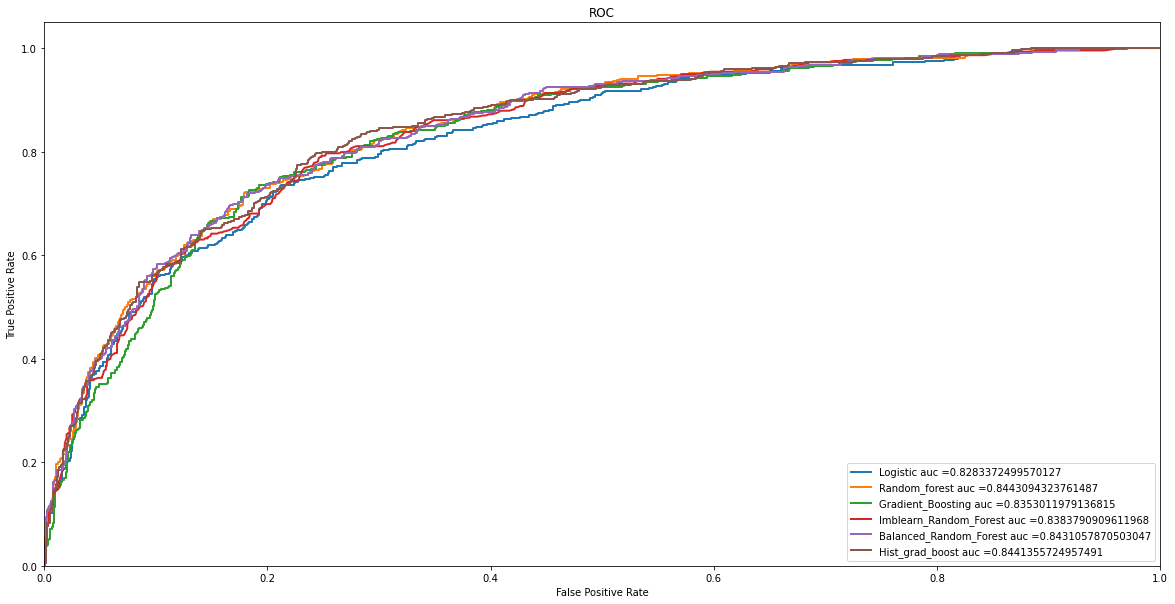

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
lw = 2
i = 0 
for key in fpr.keys() : 
    plt.plot(fpr[key], tpr[key], lw=lw, label= key+" auc ="+str(roc_auc[key]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [88]:
result = {}
for key in roc_auc.keys():
    result[key] = [roc_auc[key], ac[key]]
result = pd.DataFrame.from_dict(result, orient="index")
result = result.rename(columns={1: "accuracy", 0: "AUC"})
result.sort_values(by = 'AUC', ascending = False)

,AUC,accuracy
Random_forest,0.844309,0.805879
Hist_grad_boost,0.844136,0.809553
Balanced_Random_Forest,0.843106,0.803429
Imblearn_Random_Forest,0.838379,0.804042
Gradient_Boosting,0.835301,0.792407
Logistic,0.828337,0.803429


We observed that our estimators have a lot of resambling values. But the best one based on the AUC criterion is the HistGradientBosstClassifier. 
In our case the AUC criterion can give us a better vision than the accuaracy since we want to focus on the accuracy over the class 1. 

## 6 Estimation over the test set

In [89]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier',HistGradientBoostingClassifier(**args))]) 
# args contain the best params of the histgradientboostingclassifier

In [90]:
df_test = pd.read_csv(data_folder + "\\test_auto.csv")
df_test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [92]:
df_test = df_test.drop(columns= ["TARGET_FLAG", "TARGET_AMT"])

y_pred = clf.predict(df_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
np.mean(y_pred) # The mean over the prediction

0.11957029425502101

In [94]:
y_proba = clf.predict_proba(df_test)
y_proba

array([[0.67428446, 0.32571554],
       [0.6940075 , 0.30599245],
       [0.7670808 , 0.23291922],
       ...,
       [0.80311203, 0.19688796],
       [0.6393088 , 0.36069116],
       [0.65528095, 0.34471902]], dtype=float32)

## 7 Conclusion

Our data set is composed of many features either realted to the person or the car. 

We saw that the humain related feature are more important than car related features. In fact, we can link the car features indirectly to our humain based features. Taking this in consideration might increase the accuracy of our model. 

Also, the models that we presented had similiar perfromance in accuracy but they had different result in AUC which is a more intresting metric than the general accuracy of the model. In fact, we want the number of False postive (predicted to be 0 but in fact it's a 1) to be minimal since it will cost us more. 

As an amlioration and to enhance the models performance some further data engeneering specially the realtion between the features that are humain related and the ones car related. Also we can use some other judgment metrics such as F1-score and Recall.
